# Viscosity analysis

In this notebook, we will demonstrate how to extract the interface location between a bacterial suspension and water in a microfluidic viscometer micrograph. Typical image is shown below:

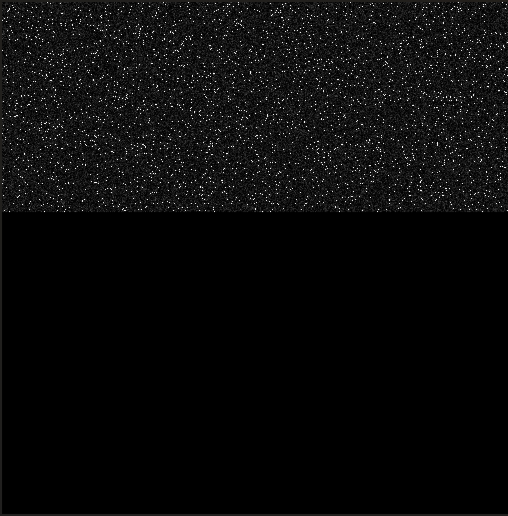

In [2]:
# import necessary modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from skimage import io

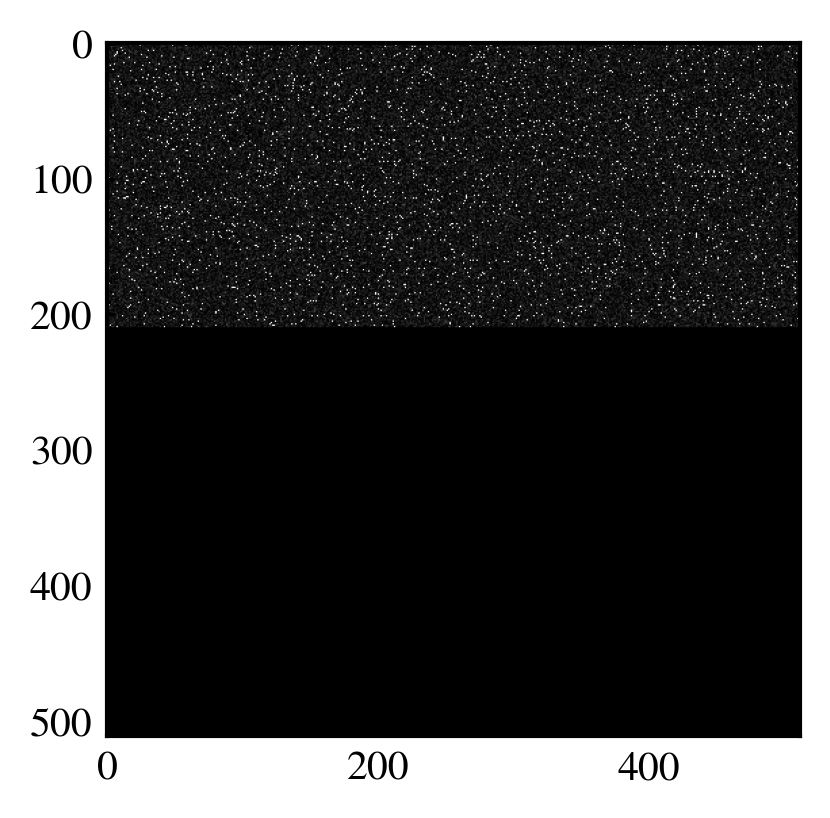

In [3]:
# read and show the image
img = io.imread("simulated_interface_image.tif")
plt.imshow(img, cmap='gray')

Text(0, 0.5, 'Mean intensity (a.u.)')

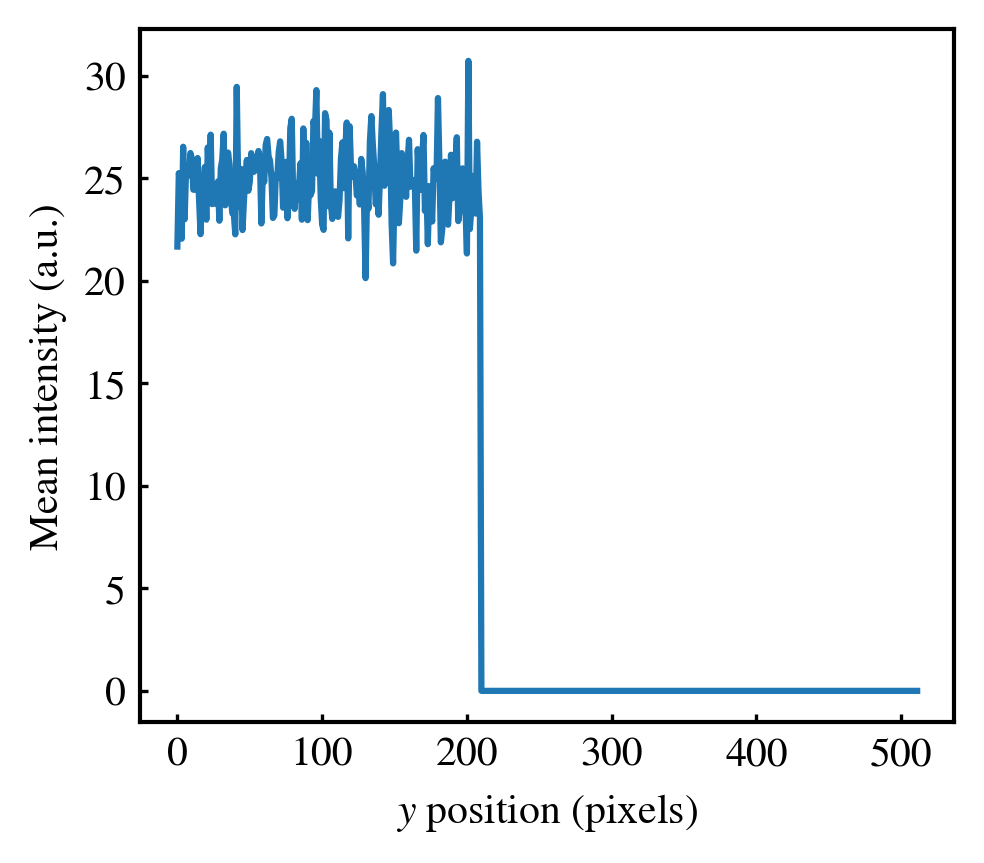

In [9]:
# average over rows to get a 1D profile
profile = np.mean(img, axis=1)
plt.plot(profile)
plt.xlabel("$y$ position (pixels)")
plt.ylabel("Mean intensity (a.u.)")

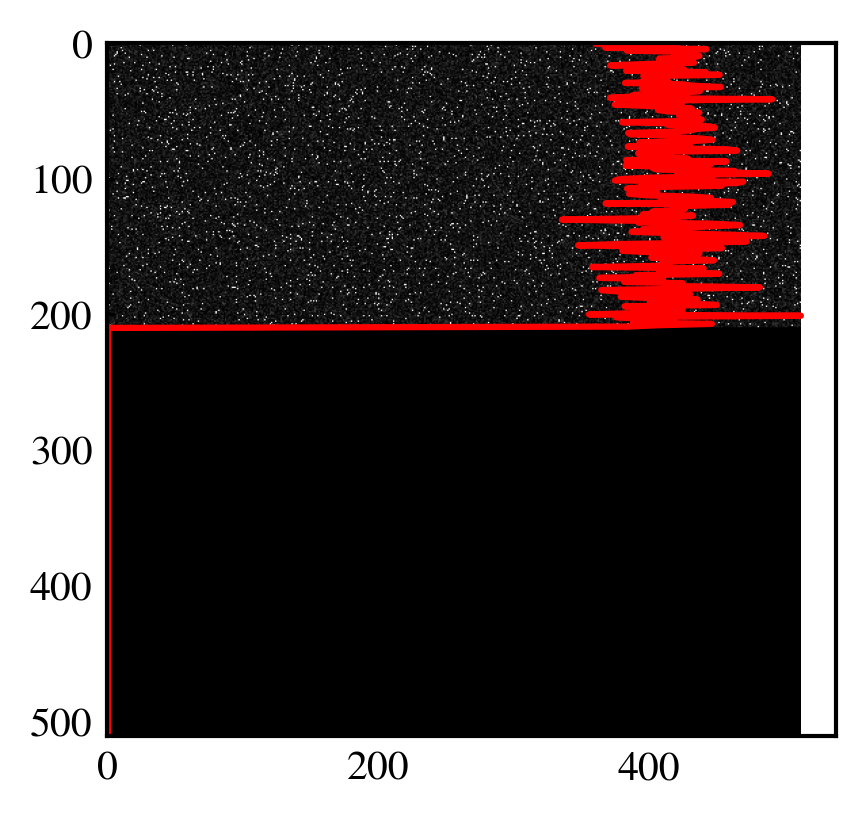

In [10]:
# overlay this curve on the image
plt.imshow(img, cmap='gray')
plt.plot(profile/profile.max()*img.shape[1], range(img.shape[0]), color='red')

In [11]:
# define error function to fit the profile
def erf_func(x, a, b, c, d):
    from scipy.special import erf
    return a * erf((x - b) / (c * np.sqrt(2))) + d

Text(0, 0.5, '$y$')

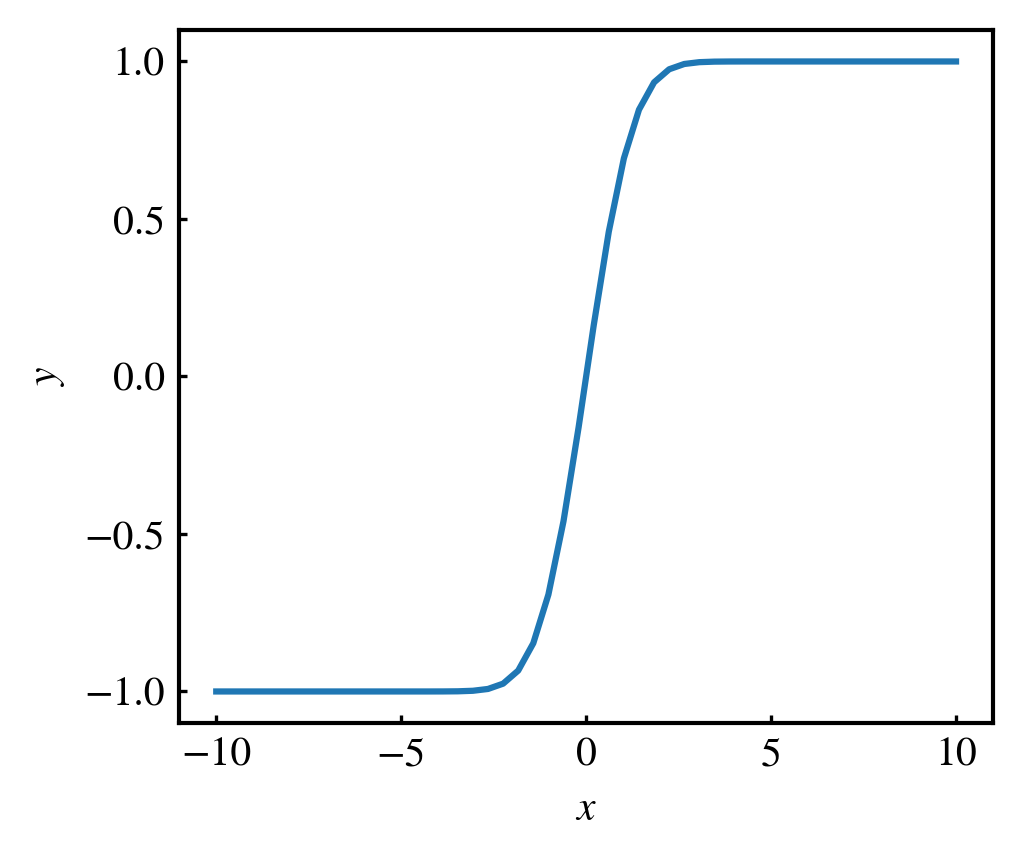

In [12]:
# check if the error function has expected shape
x = np.linspace(-10, 10)
plt.plot(x, erf_func(x, 1, 0, 1, 0))
plt.xlabel("$x$")
plt.ylabel("$y$")

In [13]:
# fit the profile
popt, pcov = curve_fit(erf_func, np.arange(len(profile)), profile, p0=[1, len(profile)/2, 1, 0])

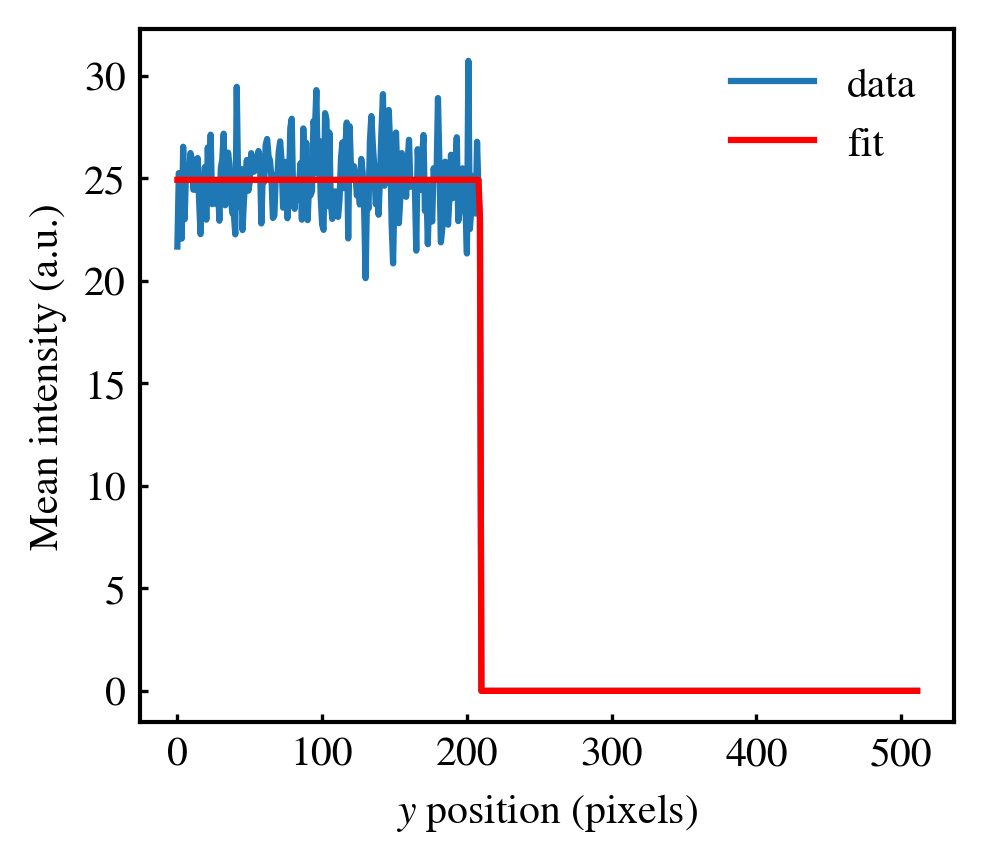

In [14]:
# check the fit quality
x = np.arange(len(profile))
plt.plot(x, profile, label="data")
plt.plot(x, erf_func(x, *popt), color='red', label="fit")
plt.xlabel("$y$ position (pixels)")
plt.ylabel("Mean intensity (a.u.)")
plt.legend()

In [15]:
# Get the location of the interface from the fitted parameters, specifically the "b" parameter
interface_location = popt[1]
print(f"Interface location (in pixels): {interface_location}")

Interface location (in pixels): 209.2589269185578


In [16]:
# compute the viscosity ratio from the width ratio （eta_1 / eta_0 = d_1 / d_0)
d_total = img.shape[0]
eta_0 = 1.0e-3
d_1 = interface_location
d_0 = d_total - d_1
eta_1 = eta_0 * d_1 / d_0
print(f"Viscosity of fluid 1 (in Pa.s): {eta_1:.1e}")

Viscosity of fluid 1 (in Pa.s): 6.9e-04
